In [1]:
import tensorflow as tf
from tensorflow import keras
from pre import Training_data
import numpy as np
import matplotlib.pyplot as plt 
import sklearn

In [3]:
#custom loss function
def SSIMLoss(y_true,y_pred):
    return 1-tf.reduce_mean(tf.image.ssim(y_true,y_pred,1.0))

#autoencoder model
autoencoder = keras.models.load_model('autoencoder', custom_objects={'SSIMLoss':SSIMLoss})

In [5]:
test = Training_data('test',11)

test_dices = np.load('test_data.npy')
test_labels = np.load('test_labels.npy')

#get anomalies
test_ano = test.get_ano()
test_ano = test.shuffle_array(test_ano)

#shuffle training data
X, y = test.unison_shuffled_copies(test_dices,test_labels)

#max samples
samples = 15
X = X[:samples]
y = y[:samples]
test_ano = test_ano[:samples]

In [50]:
#prediction anomalies
ano_prediction = autoencoder.predict(test_ano)

#prediction dices
prediction = autoencoder.predict(X)

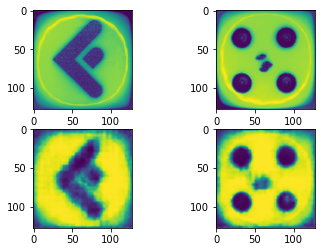

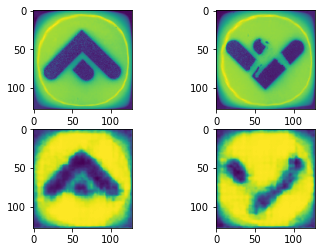

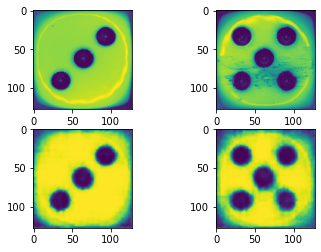

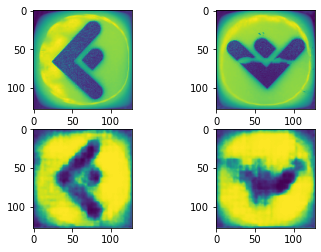

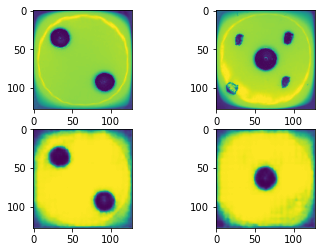

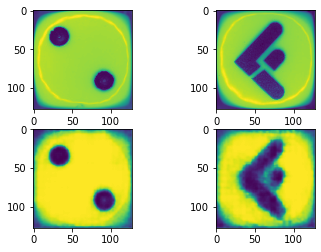

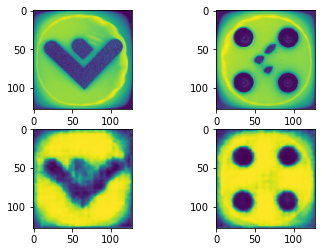

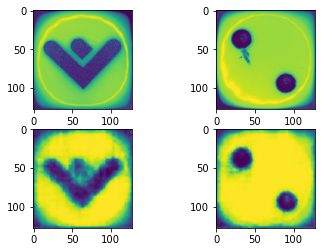

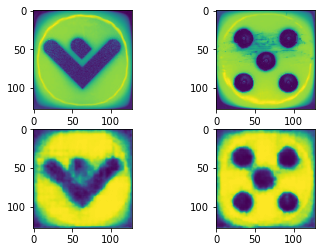

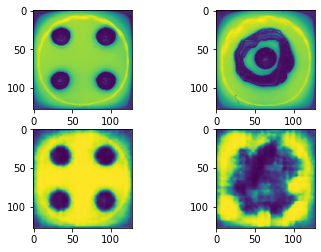

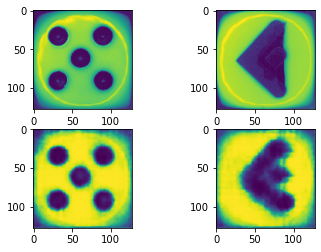

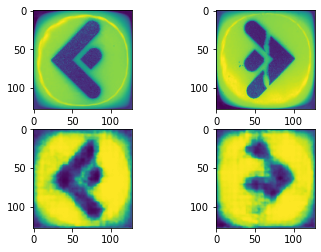

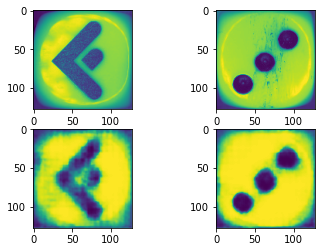

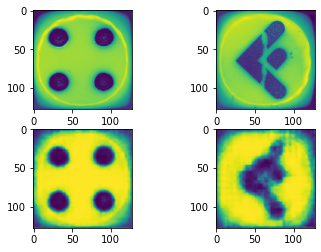

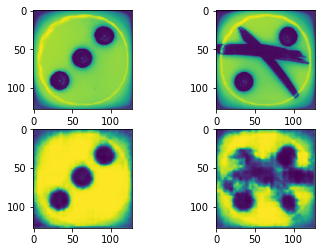

In [51]:
for i in range(samples):
    fig, axs = plt.subplots(2,2)
    axs[0,0].imshow(X[i])
    axs[1,0].imshow(prediction[i])
    axs[0,1].imshow(test_ano[i])
    axs[1,1].imshow(ano_prediction[i])
    plt.show()